## Contexte

**Auteur:** Marcel Morel Adjalla

Ce notebook étudie la capacité de la filtration DTM (Distance to Measure) à estimer les groupes d'homologie d’un sous-manifold à partir d’un échantillon bruité. L'objectif est de récupérer des caractéristiques topologiques robustes malgré la présence de bruit.

## Filtration DTM

La filtration DTM est une version pondérée de la filtration de Čech, définie sur un nuage de points $X \subset \mathbb{R}^n$ à l’aide de deux paramètres :
- $m \in (0, 1)$ : proportion locale de voisins utilisés pour le calcul de la DTM,
- $p \in [1, \infty[$ : paramètre de la norme utilisée.

La filtration est définie par :
$$
W^t[X, m, p] = \bigcup_{x \in X} \overline{B}\left(x, \left(t^p - d_{\mu_X, m}(x)^p\right)^{1/p} \right),
$$
où $d_{\mu_X, m}(x)$ est la DTM évaluée en $x$ et $\overline{B}(x, r)$ est la boule fermée centrée en $x$ de rayon $r$, vide si $r < 0$.

## Données

Les expériences sont menées sur un nuage de points en forme de double cercle (structure en "8"), avec des points aberrants répartis à l’extérieur des cycles. L’objectif est de comparer la filtration DTM à la filtration de Rips classique.

## Outils

L’implémentation repose sur la bibliothèque `velour`, qui fournit :
- `DTMFiltration` pour générer la filtration pondérée,
- `PlotPersistenceDiagram` pour visualiser le diagramme de persistance,
- `PlotPointCloud` pour représenter les points avec leur pondération DTM.


In [1]:
!pip install velour


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import velour

ModuleNotFoundError: No module named 'velour'

In [ ]:
def generate_figure8_points(n_points_per_circle=100, noise_points=80, radius=1.0):
    theta = np.linspace(0, 2 * np.pi, n_points_per_circle)
    circle1 = np.vstack((radius * np.cos(theta), radius * np.sin(theta))).T
    circle2 = np.vstack((radius * np.cos(theta), radius * np.sin(theta) + 2 * radius)).T  # centré à 2*radius en y

    noise = np.random.uniform(low=[-2, -1], high=[2, 2 + 2 * radius], size=(noise_points, 2))
    X = np.vstack((circle1, circle2, noise))
    return X

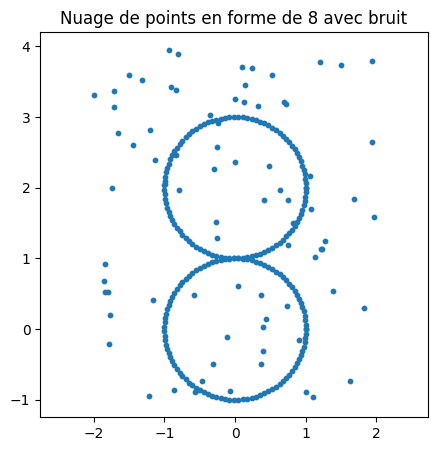

In [ ]:
X = generate_figure8_points()

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Nuage de points en forme de 8 avec bruit")
plt.axis("equal")
plt.show()

Rips Complex is of dimension 3 - 103090 simplices - 280 vertices. Filtration maximal value is 0.3.


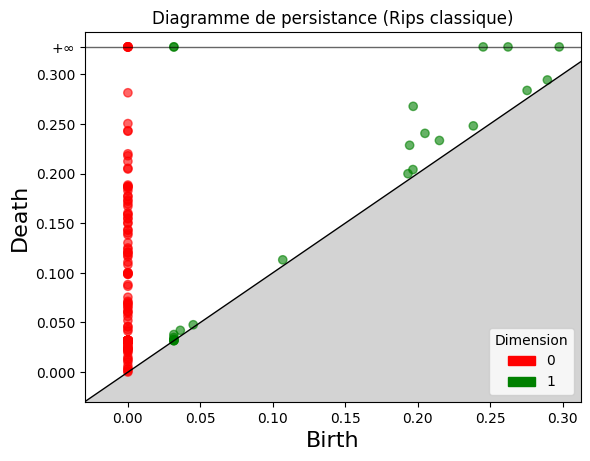

In [ ]:
filtration_max = 0.3
st_Rips = velour.RipsComplex(X, filtration_max=filtration_max)

velour.PlotPersistenceDiagram(st_Rips)
plt.title("Diagramme de persistance (Rips classique)")
plt.show()


Le diagramme de persistance obtenu par la filtration de Rips classique révèle une sensibilité importante au bruit.

Bien que l'on observe plusieurs classes de dimension 1, leur persistance est relativement faible, ce qui rend difficile l'identification fiable des deux cycles principaux présents dans le nuage de points initial.

Cela illustre les limites de la filtration de Rips en présence de points aberrants ou de bruit structuré.


In [ ]:
m = 0.01
p = 1
filtration_max = 0.7
dimension_max = 2

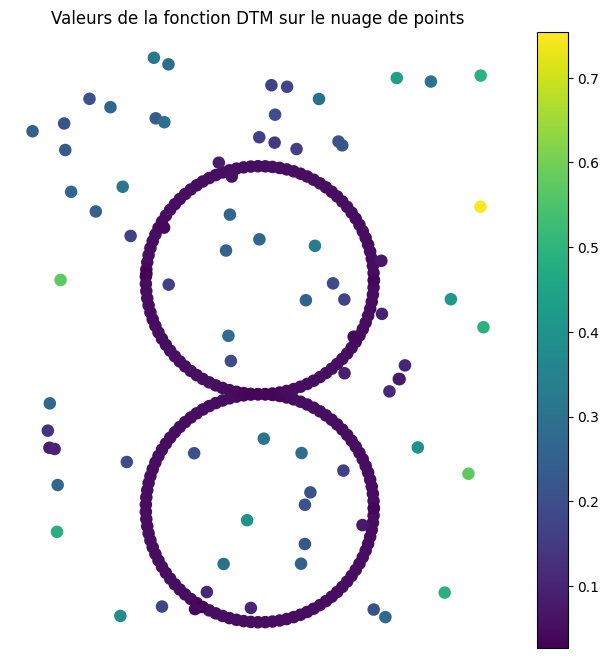

In [ ]:
dtm_values = velour.DTM(X, X, m)


velour.PlotPointCloud(X, values=dtm_values)
plt.title("Valeurs de la fonction DTM sur le nuage de points")
plt.show()

In [ ]:
st_DTM = velour.DTMFiltration(X, m=m, p=p,
                               dimension_max=dimension_max,
                               filtration_max=filtration_max)

Weighted Rips Complex is of dimension 2 - 164357 simplices - 279 vertices. Filtration maximal value is 0.7.


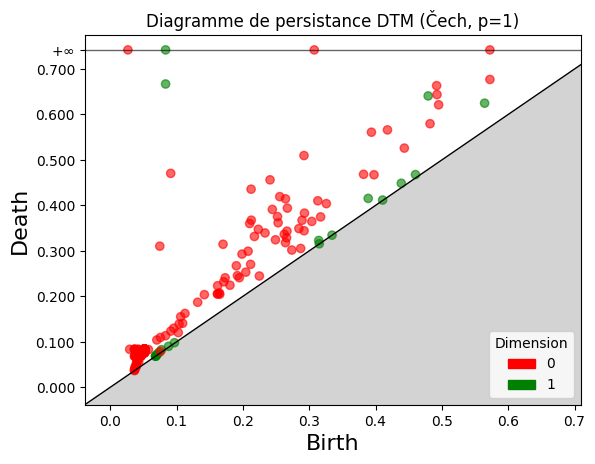

In [ ]:
velour.PlotPersistenceDiagram(st_DTM)
plt.title("Diagramme de persistance DTM (Čech, p=1)")
plt.show()

Weighted Rips Complex is of dimension 2 - 232009 simplices - 279 vertices. Filtration maximal value is 0.7.


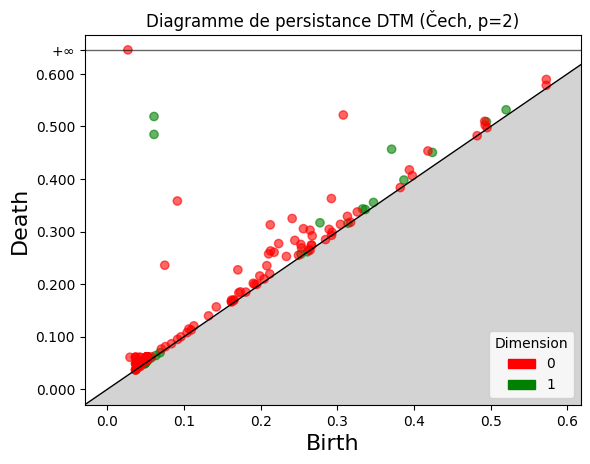

Weighted Rips Complex is of dimension 2 - 245645 simplices - 279 vertices. Filtration maximal value is 0.7.


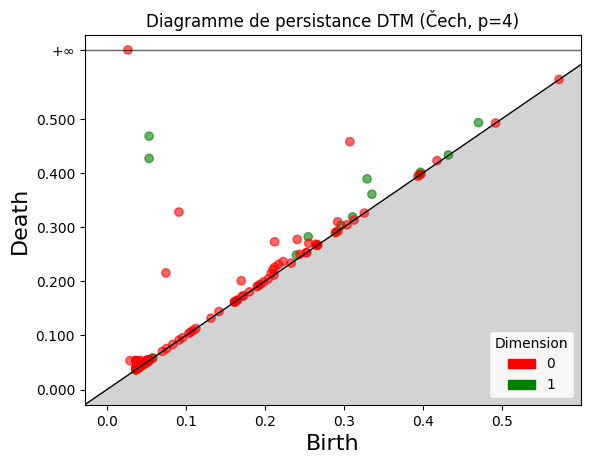

Weighted Rips Complex is of dimension 2 - 247415 simplices - 279 vertices. Filtration maximal value is 0.7.


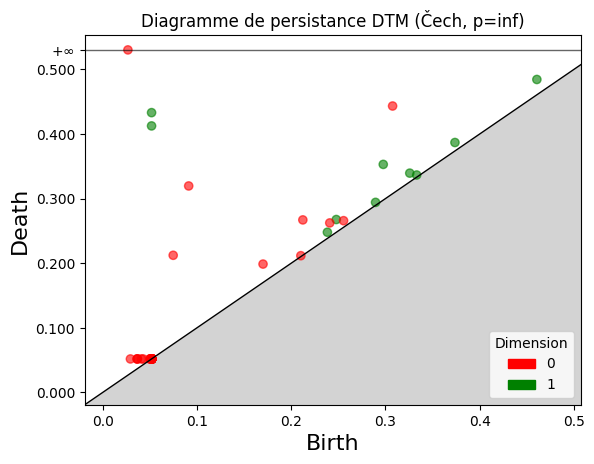

In [ ]:
p_values = [2, 4, np.inf]

# pour chaque valeur de p
for p in p_values:
    st_DTM = velour.DTMFiltration(X, m, p, dimension_max=dimension_max, filtration_max=filtration_max)
    velour.PlotPersistenceDiagram(st_DTM)
    plt.title(f"Diagramme de persistance DTM (Čech, p={p})")
    plt.show()

$$
\text{Nous avons représenté le diagramme de persistance issu de la filtration DTM pour différentes valeurs de } p \in \{2, 4, +\infty\}.
$$

$$
\text{Cela permet d'observer l'impact du paramètre } p \text{ sur la robustesse de la topologie extraite à partir du nuage de points bruité.}
$$


## Conclusion

Cette étude expérimentale montre que la filtration DTM permet d'extraire de manière fiable les caractéristiques topologiques d'un nuage de points bruité. Contrairement à la filtration de Rips classique, la DTM parvient à ignorer les points aberrants et à détecter avec stabilité les cycles significatifs, notamment lorsque le paramètre $p$ est bien choisi. Elle constitue donc une approche robuste et pertinente pour l'analyse topologique en présence de bruit.
